In [20]:

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics

data = pd.read_csv('C:/Users/HOANG NAM/Desktop/winequality-red.csv',sep =';')
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:>

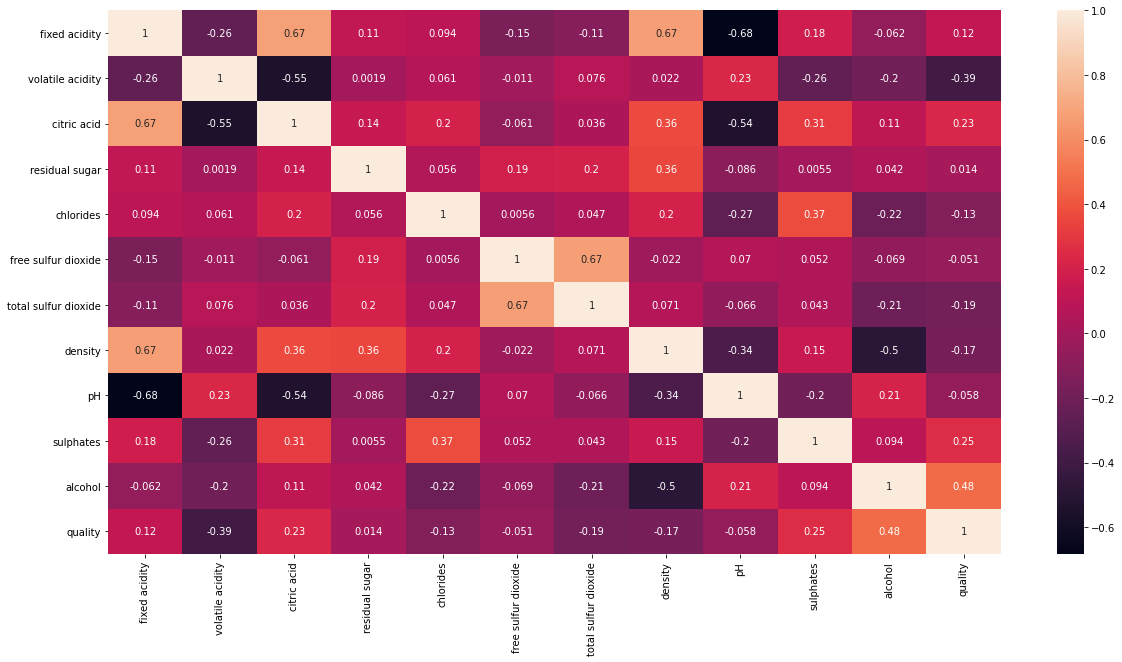

In [22]:
#Khảo sát độ tương đồng giữa các cột với nhau
plt.figure (figsize=(20,10))
sns.heatmap(data.corr( method='pearson' ),annot=True)


In [23]:
#Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một
#phần chứa riêng thuộc tính quyết định.
features = data.drop( 'quality' , axis=1)
y = data[ 'quality' ]


In [24]:
#Chuyển đổi các cột không phải dạng số về dạng one-hot vector
X=pd.get_dummies ( features , columns =features.select_dtypes(exclude=['int64']).columns)
X


,fixed acidity_4.6,fixed acidity_4.7,fixed acidity_4.9,fixed acidity_5.0,fixed acidity_5.1,fixed acidity_5.2,fixed acidity_5.3,fixed acidity_5.4,fixed acidity_5.5,fixed acidity_5.6,...,alcohol_13.0,alcohol_13.1,alcohol_13.2,alcohol_13.3,alcohol_13.4,alcohol_13.5,alcohol_13.5666666666667,alcohol_13.6,alcohol_14.0,alcohol_14.9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử như ban đầu.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)


In [26]:
#Xây dựng cây ID3
clf=tree.DecisionTreeClassifier(criterion="entropy", random_state=0) 
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [27]:
#áp dụng mô hình trên dữ liệu kiểm thử.
tree_pred = clf.predict(X_test)
tree_score=metrics.accuracy_score(y_test, tree_pred) 
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))


Accuracy: 0.5875
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.29      0.12      0.17        17
           5       0.62      0.69      0.65       195
           6       0.61      0.59      0.60       200
           7       0.45      0.44      0.45        61
           8       0.33      0.17      0.22         6

    accuracy                           0.59       480
   macro avg       0.38      0.33      0.35       480
weighted avg       0.58      0.59      0.58       480



In [28]:
#ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test,tree_pred)

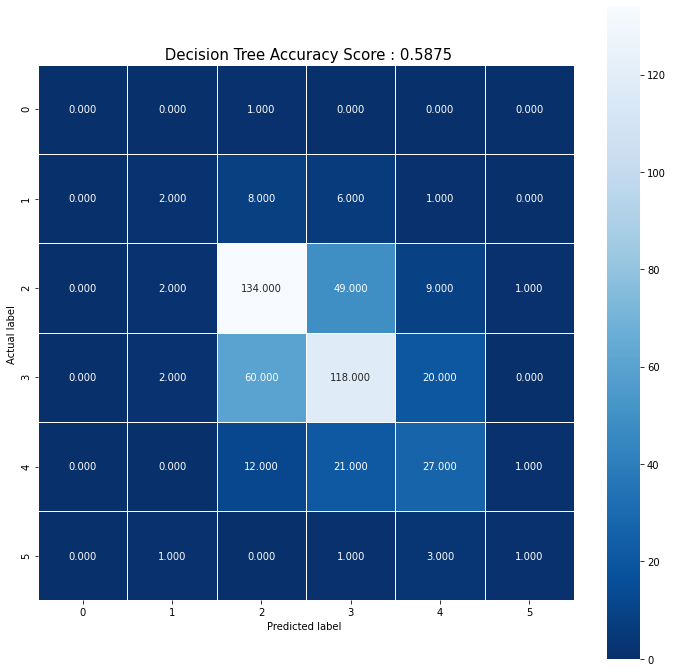

In [29]:
#biểu diễn ma trận nhầm lẫn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns. heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r' );
plt.ylabel('Actual label '); 
plt.xlabel('Predicted label ') ;
title = ' Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size = 15);


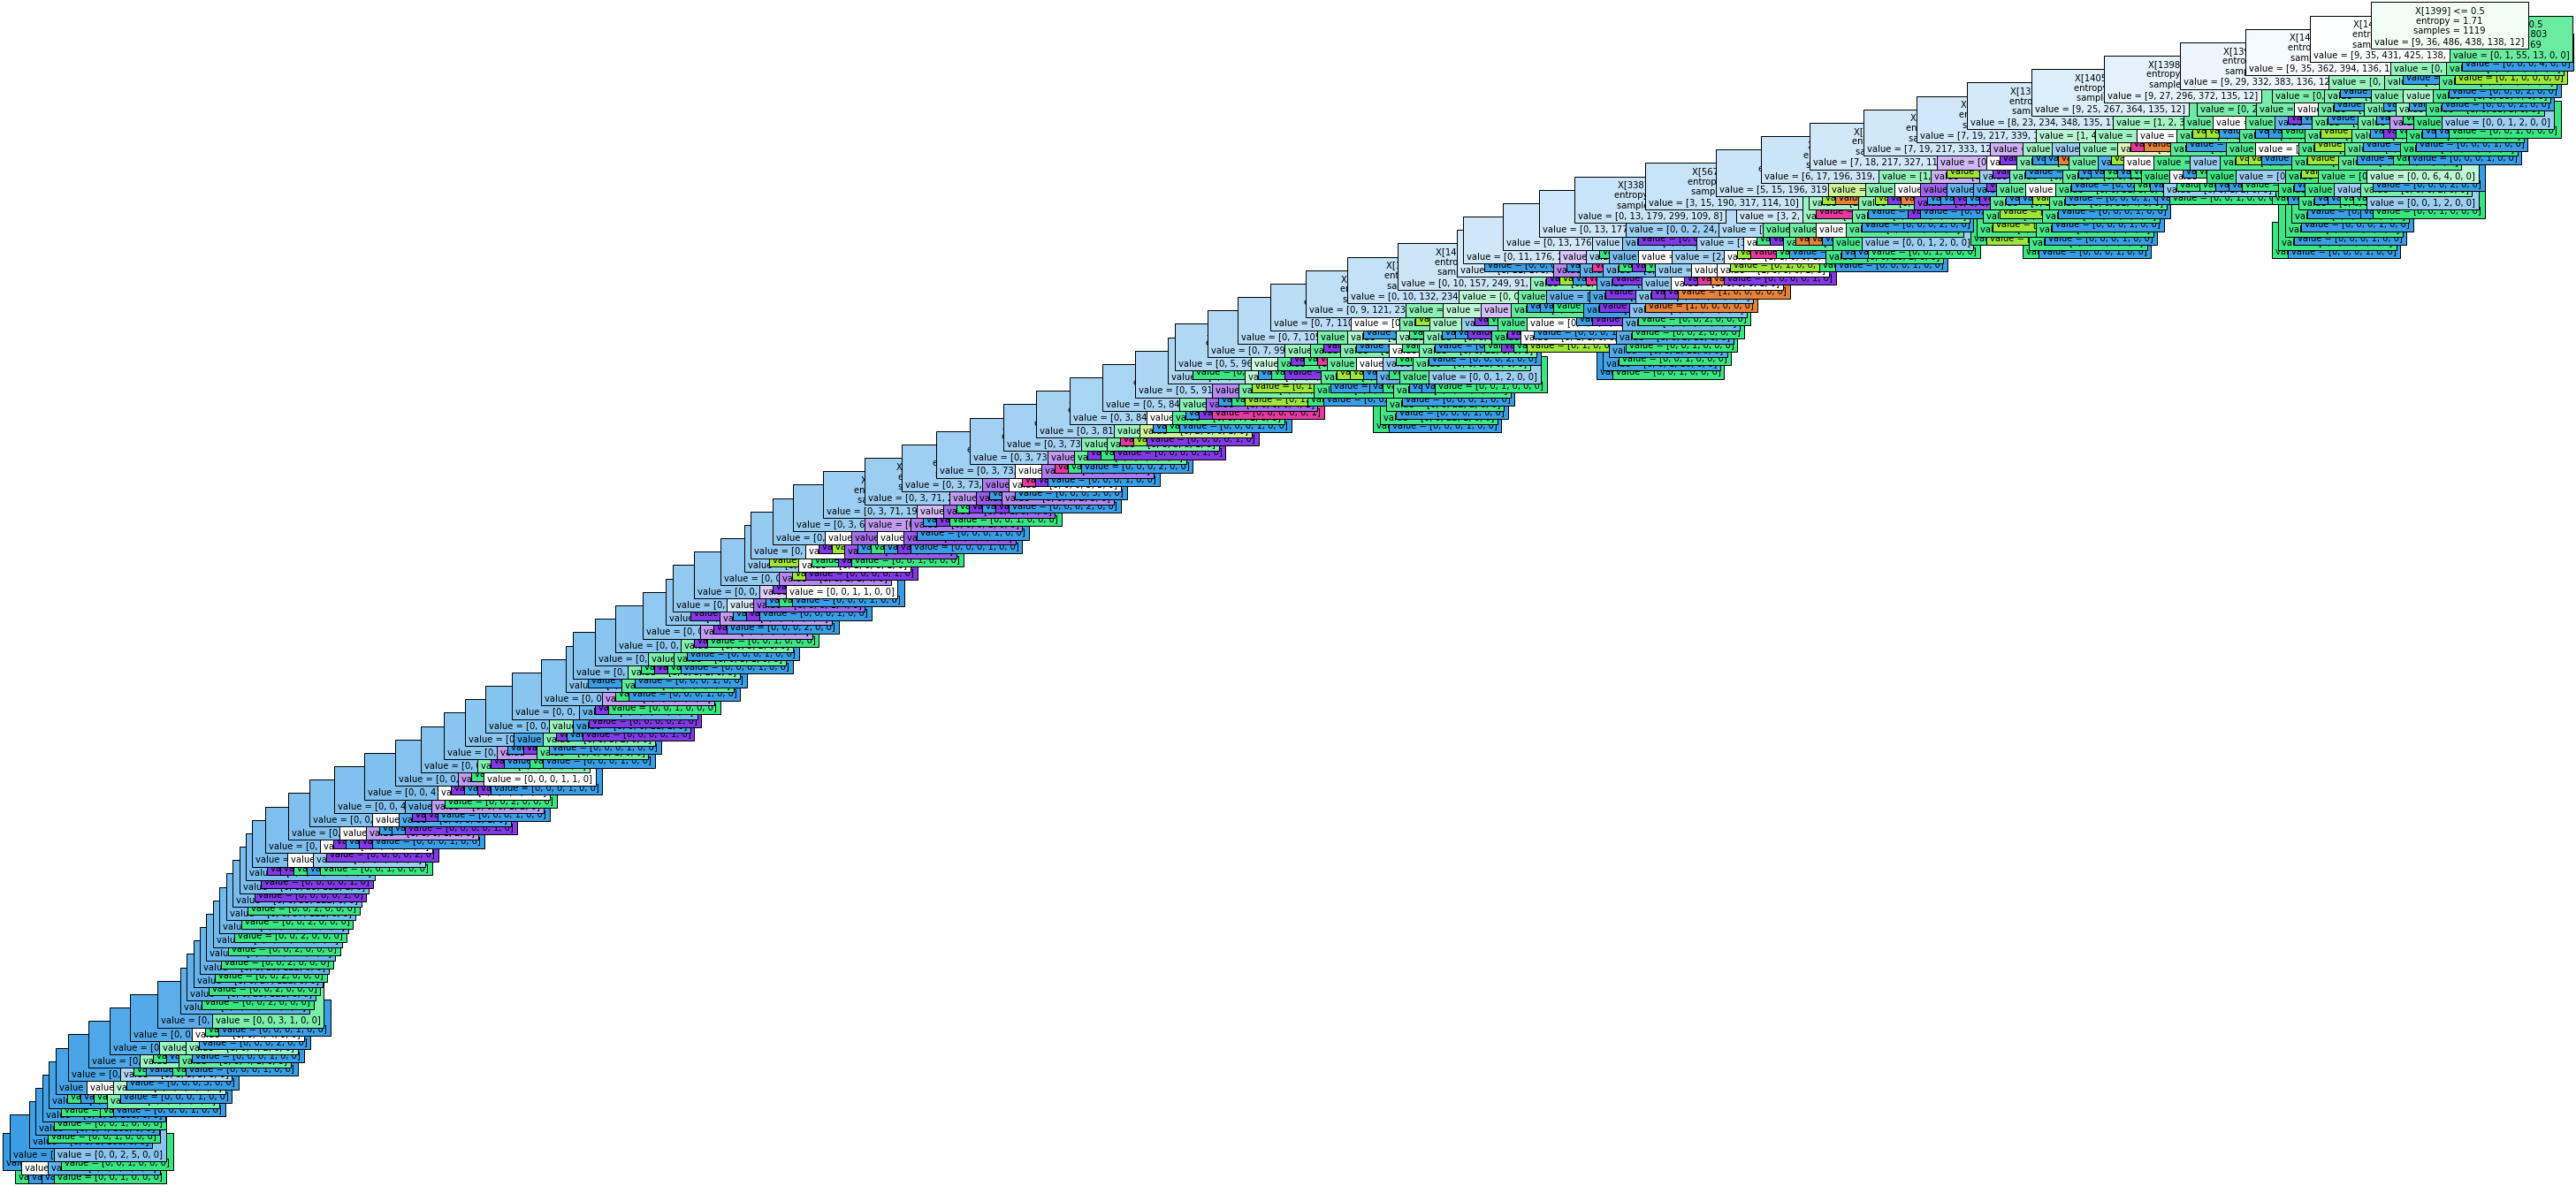

In [30]:
#vẽ cây ID3
fig, ax = plt. subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10) 
plt.savefig(' decision tree', dpi=100)
plt.show()

In [31]:
#Xây dựng cây CART
clf=tree.DecisionTreeClassifier(criterion="gini", random_state=0) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [32]:
#áp dụng mô hình trên dữ liệu kiểm thử.
tree_pred = clf.predict(X_test)
tree_score=metrics.accuracy_score(y_test, tree_pred) 
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.5645833333333333
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.10      0.06      0.07        17
           5       0.62      0.73      0.67       195
           6       0.56      0.51      0.53       200
           7       0.43      0.41      0.42        61
           8       1.00      0.17      0.29         6

    accuracy                           0.56       480
   macro avg       0.45      0.31      0.33       480
weighted avg       0.56      0.56      0.55       480



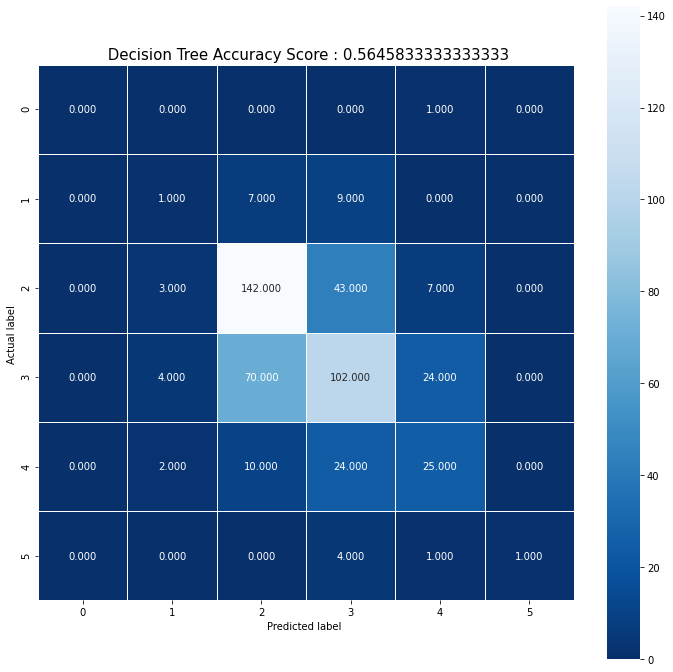

In [33]:
#ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test,tree_pred)
#biểu diễn ma trận nhầm lẫn lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns. heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r' );
plt.ylabel('Actual label '); 
plt.xlabel('Predicted label ') ;
title = ' Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size = 15);

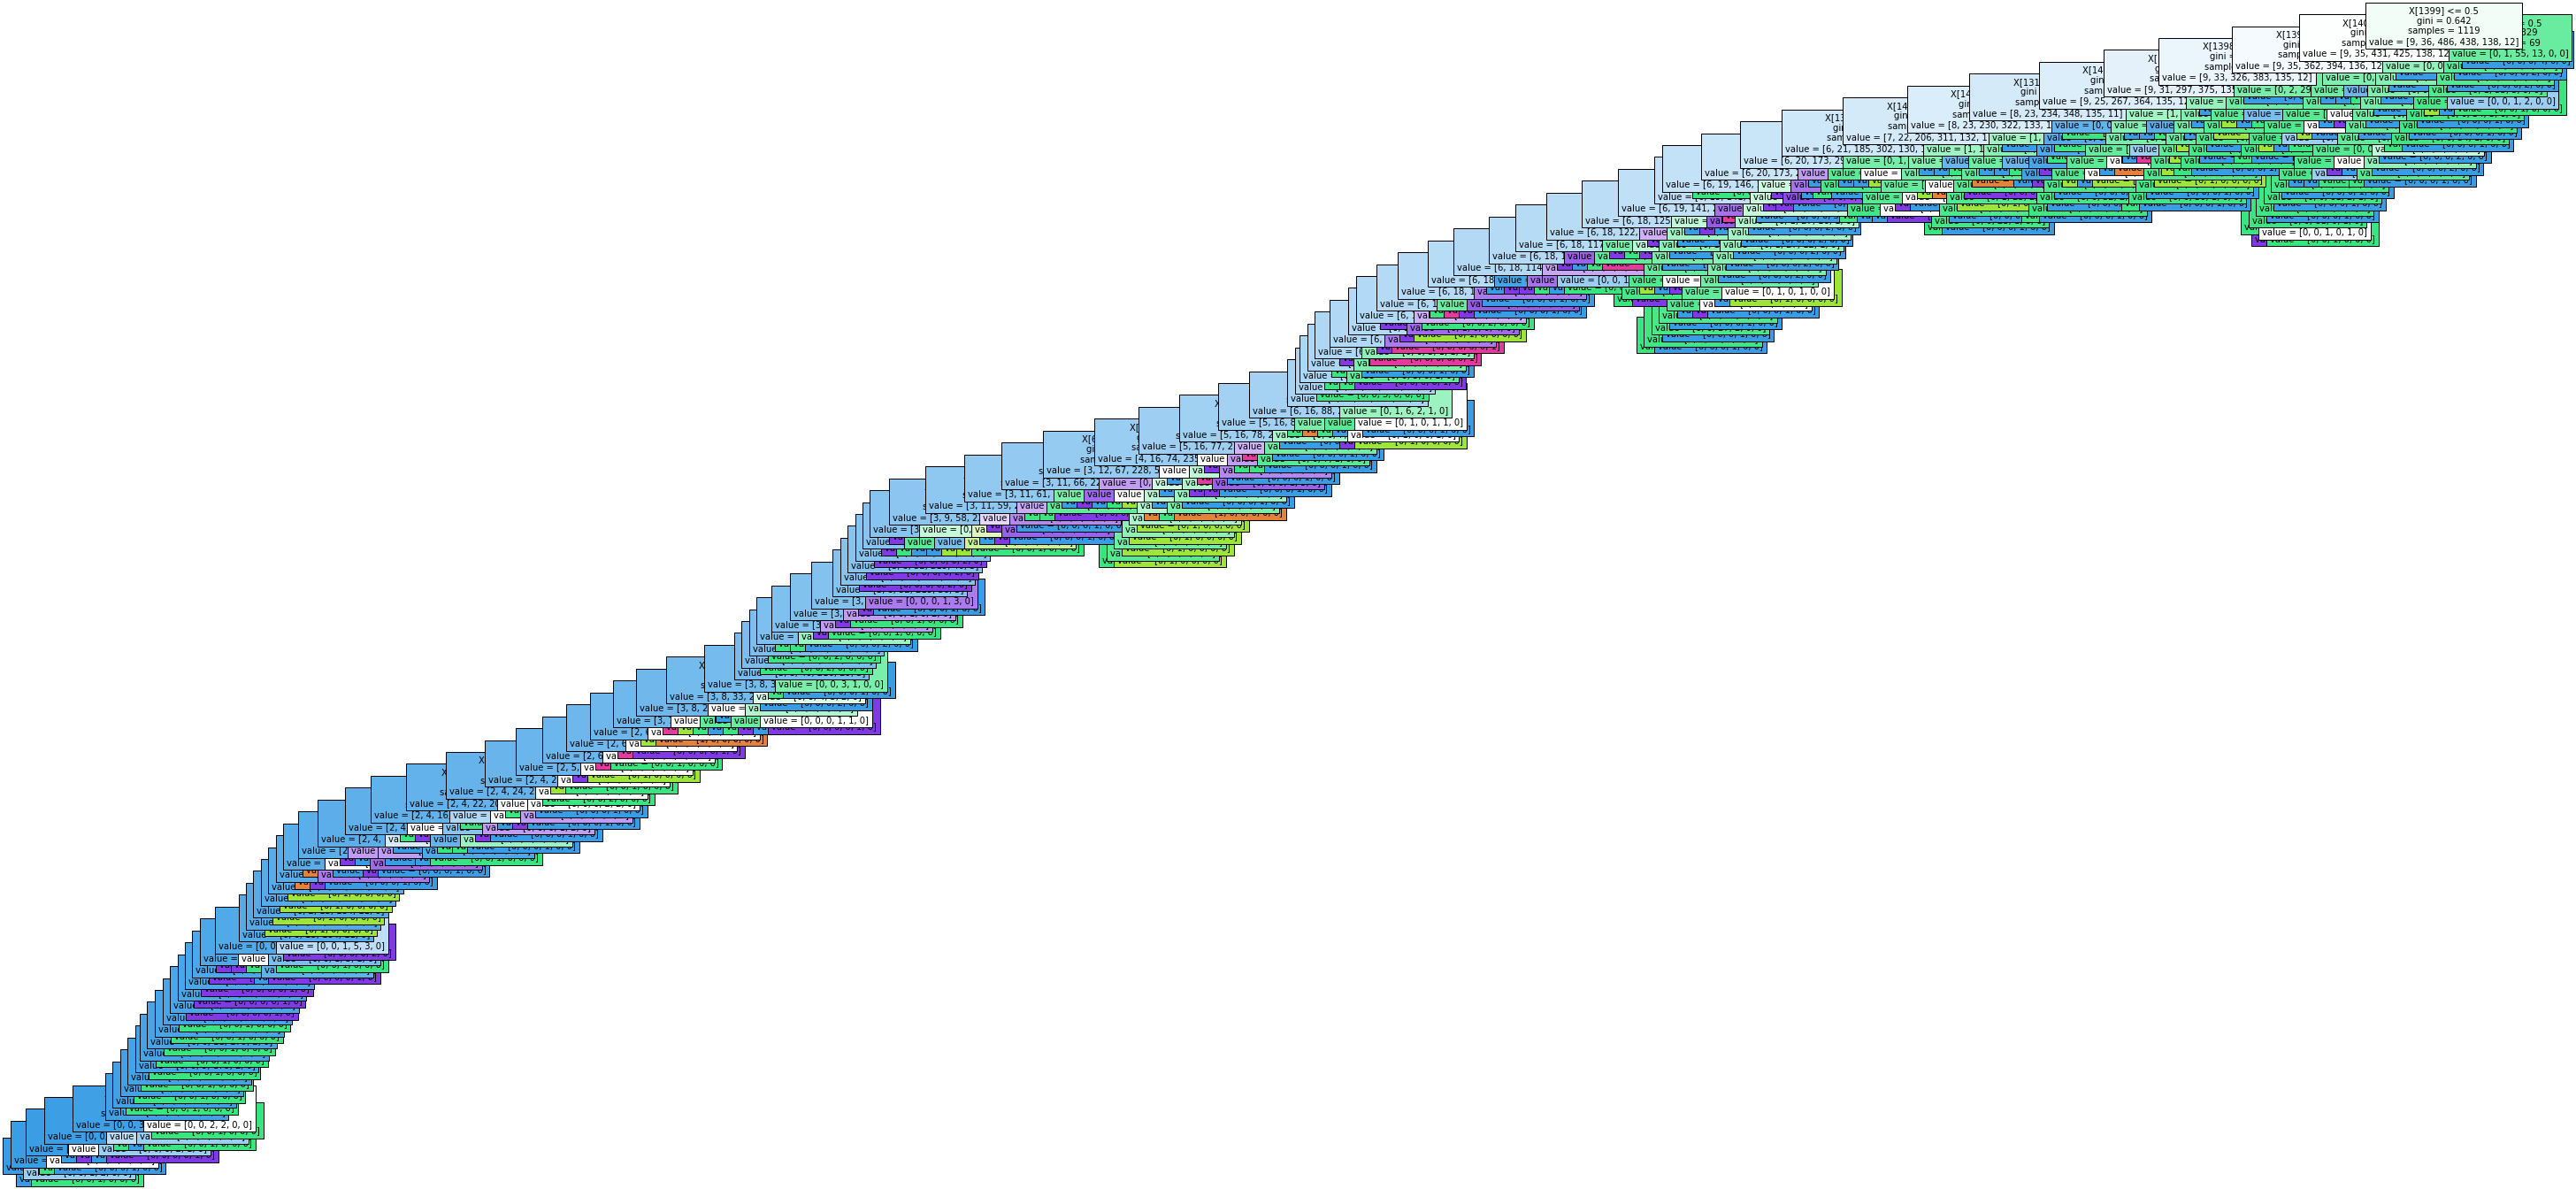

In [34]:
#vẽ cây CART
fig, ax = plt. subplots(figsize=(50, 24))
tree.plot_tree(clf, filled=True, fontsize=10) 
plt.savefig(' decision tree', dpi=100)
plt.show()

In [35]:
#Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)


In [36]:
#Tính toán các giá trị của mô hình
bayes_score = metrics.accuracy_score(y_test, bayes_pred) 
print("Accuracy", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))


Accuracy 0.5583333333333333
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.70      0.46      0.56       195
           6       0.50      0.76      0.61       200
           7       0.51      0.41      0.45        61
           8       1.00      0.17      0.29         6

    accuracy                           0.56       480
   macro avg       0.45      0.30      0.32       480
weighted avg       0.57      0.56      0.54       480



Text(0.5, 1.0, 'Naive Bayes Accuracy: 0.5583333333333333')

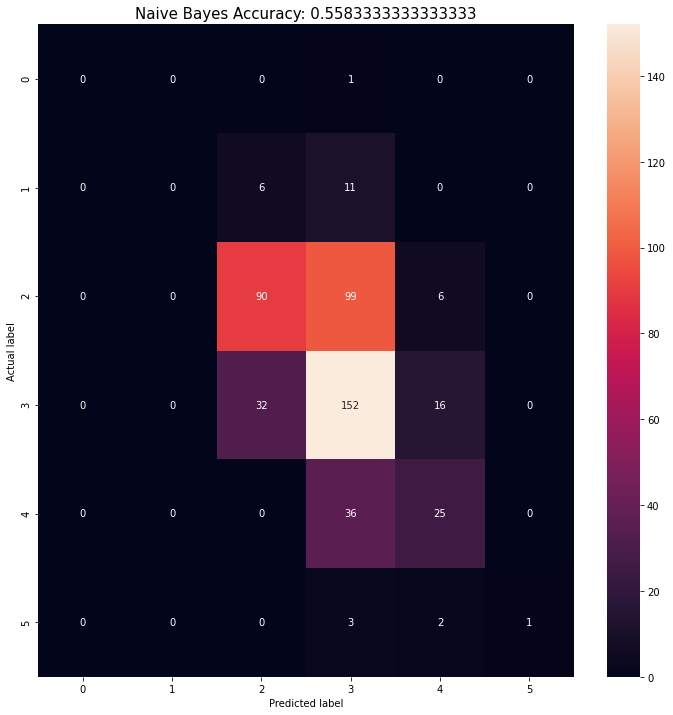

In [37]:
#ma trận nhầm lẫn bằng đồ thị heatmap.
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)
fig = plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".0f"); 
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy: {0}'.format(bayes_score) 
plt.title(title,size=15)
